<a href="https://colab.research.google.com/github/QQCPM/Decision-Tree/blob/main/DecTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# PROBLEM 1: EXPLORATORY ANALYSIS

In [ ]:
df = pd.read_csv('quizData_SetB.csv')
df.head()

,Height,Weight,Diameter,Price
0,0.010,0.0015,0.055,Low
1,0.025,0.0050,0.100,Low
2,0.030,0.0040,0.100,Low
3,0.030,0.0030,0.090,Low
4,0.030,0.0050,0.120,Low


In [ ]:
df_num = df[df.columns[:-1]]
df_num.head()

,Height,Weight,Diameter
0,0.010,0.0015,0.055
1,0.025,0.0050,0.100
2,0.030,0.0040,0.100
3,0.030,0.0030,0.090
4,0.030,0.0050,0.120


In [ ]:
df.describe()

,Height,Weight,Diameter
count,4000.000000,4000.000000,4000.000000
mean,0.138874,0.236674,0.406095
std,0.042092,0.139511,0.099668
min,0.000000,0.001500,0.055000
25%,0.110000,0.125375,0.345000
50%,0.140000,0.229500,0.420000
75%,0.165000,0.325000,0.480000
max,1.130000,1.005000,0.650000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


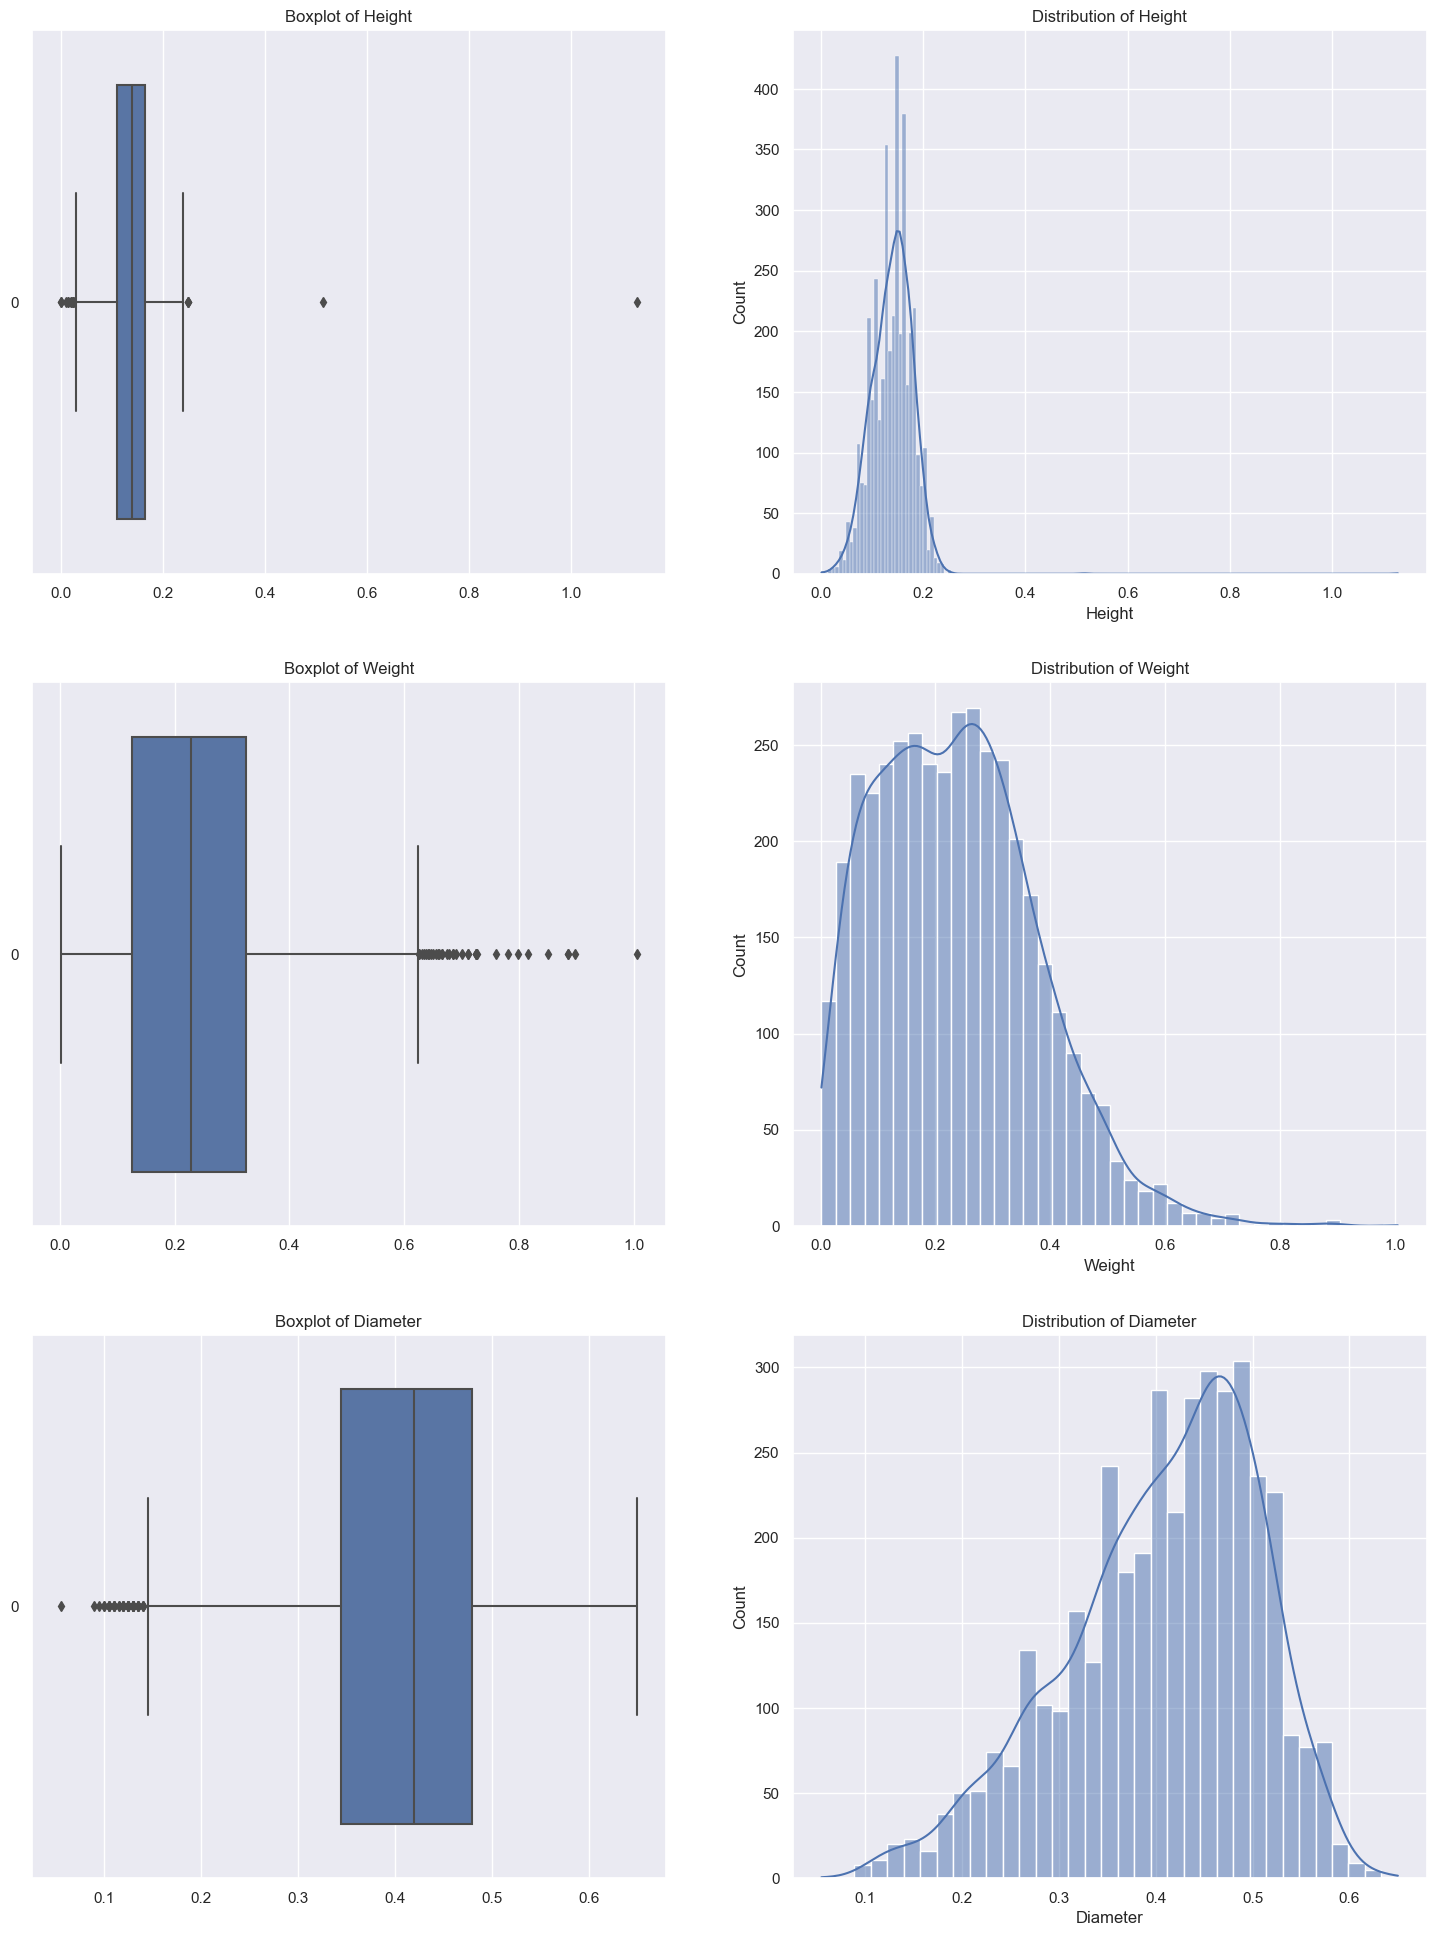

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(18, 24))
for i, var in enumerate(df_num.columns):
    sb.boxplot(data = df[var], orient ='h', ax = axes[i,0])
    axes[i,0].set_title(f'Boxplot of {var}')
    sb.histplot(data = df[var], kde = True, ax = axes[i,1])
    axes[i,1].set_title(f'Distribution of {var}')

In [ ]:
for var in df_num.columns:
    q1 = np.quantile(df_num[var], 0.25)
    q3 = np.quantile(df_num[var], 0.75)
    iqr = q3-q1
    upperbound = q3+1.5*iqr
    lowerbound = q1-1.5*iqr
    outliers = df_num[var][(df_num[var] <= lowerbound) | (df_num[var] >= upperbound)]
    print(f"Number of outliers in {var} is "+ str(len(outliers)))

Number of outliers in Height is 17
Number of outliers in Weight is 35
Number of outliers in Diameter is 43


Variable "Diameter" has the most numbers of outliers.

In [ ]:
df["Price"].value_counts()

Price
Low     2623
High    1377
Name: count, dtype: int64

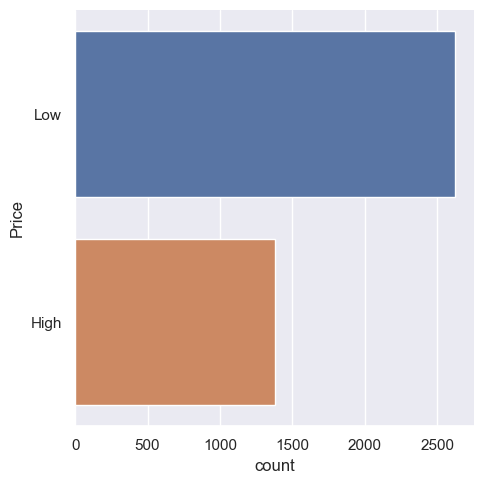

In [ ]:
sb.catplot(y = "Price", data = df, kind = "count")

In [ ]:
ratio = df["Price"].value_counts().iloc[0] / df["Price"].value_counts().iloc[1]
print('The ratio of "Low:High" in Price is ', ratio)

The ratio of "Low:High" in Price is  1.9048656499636891


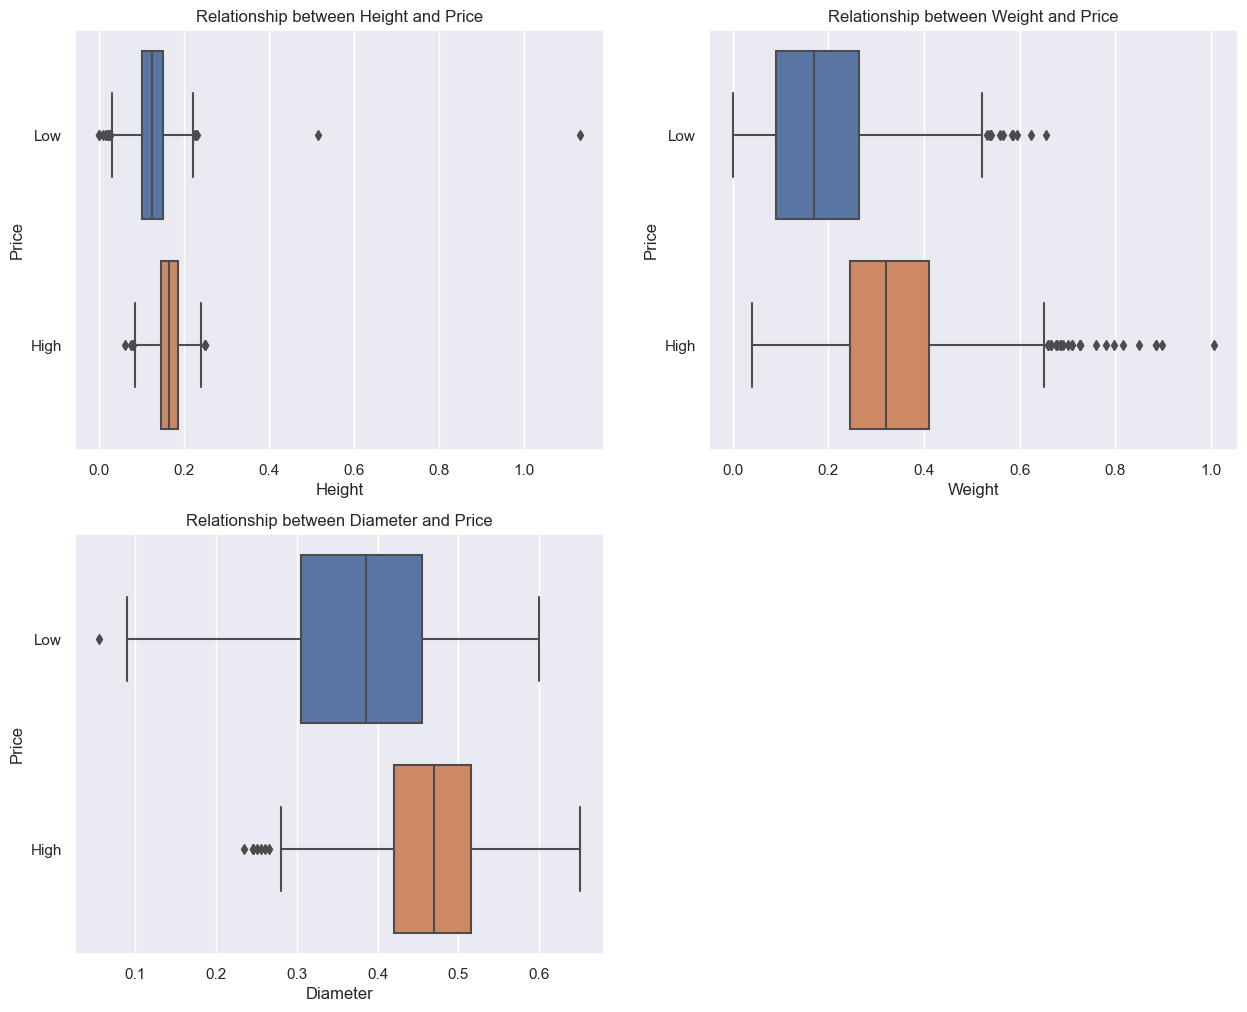

In [ ]:
plt.figure(figsize = (15,12))
for i, var in enumerate(df_num, 1):
    plt.subplot(2,2,i)
    sb.boxplot(x = var, y = "Price", data = df, orient = "h")
    plt.title(f'Relationship between {var} and Price')

Diameter could be the most important feature as we look at these boxplots, Diameter shows a clear separation between the 'Low' and 'High' price.

## PROBLEM 2: UNI-VARIATE DECISTION TREE

In [ ]:
# Import Decision Tree Classifier essential models and functions from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier()

In [ ]:
# Extract Response and Predictors
X = df[['Height', 'Weight', 'Diameter']]
y = df['Price']

In [ ]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 62)

Goodness of Fit of Model Height 	Train Dataset
Classification Accuracy 	: 0.7275

Goodness of Fit of Model Height 	Test Dataset
Classification Accuracy 	: 0.7425



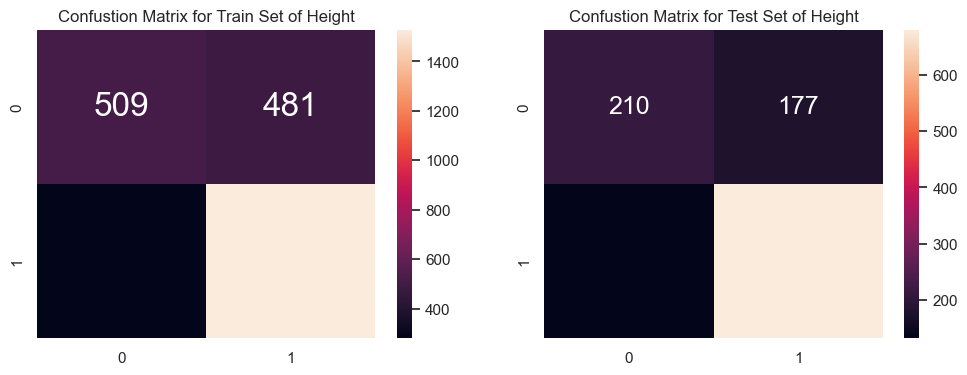

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
for var in X.columns:
    # Decision Tree using Train Data

    dectree.fit(X_train[[var]], y_train)                    # Train the Decision Tree Classifier model

    # Predict Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train[[var]])
    y_test_pred = dectree.predict(X_test[[var]])

    # Check the Goodness of Fit (on Train Data)
    print(f"Goodness of Fit of Model {var} \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train[[var]], y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print(f"Goodness of Fit of Model {var} \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test[[var]], y_test))
    print()

    # Plot the two-way Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 24}, ax = axes[0])
    axes[0].set_title(f'Confustion Matrix for Train Set of {var}')
    sb.heatmap(confusion_matrix(y_test, y_test_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    axes[1].set_title(f'Confustion Matrix for Test Set of {var}')
    plt.show()

        # Import export_graphviz from sklearn.tree
    from sklearn.tree import export_graphviz

    # Export the Decision Tree as a dot object
    treedot = export_graphviz(dectree,                                                   # the model
                              feature_names = X_train[[var]].columns.tolist(),           # the features
                              out_file = None,                                           # output file
                              filled = True,                                             # node colors
                              rounded = True,                                            # make pretty
                              special_characters = True)                                 # postscript

    # Render using graphviz
    #import os
    #os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    import graphviz
    s = graphviz.Source(treedot)

    from IPython.display import display
    display(s)

--- Height Model ---
Classification Accuracy on Train: 0.7275
Classification Accuracy on Test: 0.7425
Confusion Matrix on Train:
[[ 509  481]
 [ 282 1528]]
Confusion Matrix on Test:
[[210 177]
 [132 681]]

--- Weight Model ---
Classification Accuracy on Train: 0.8164285714285714
Classification Accuracy on Test: 0.7066666666666667
Confusion Matrix on Train:
[[ 773  217]
 [ 297 1513]]
Confusion Matrix on Test:
[[251 136]
 [216 597]]

--- Diameter Model ---
Classification Accuracy on Train: 0.7175
Classification Accuracy on Test: 0.7241666666666666
Confusion Matrix on Train:
[[ 433  557]
 [ 234 1576]]
Confusion Matrix on Test:
[[171 216]
 [115 698]]



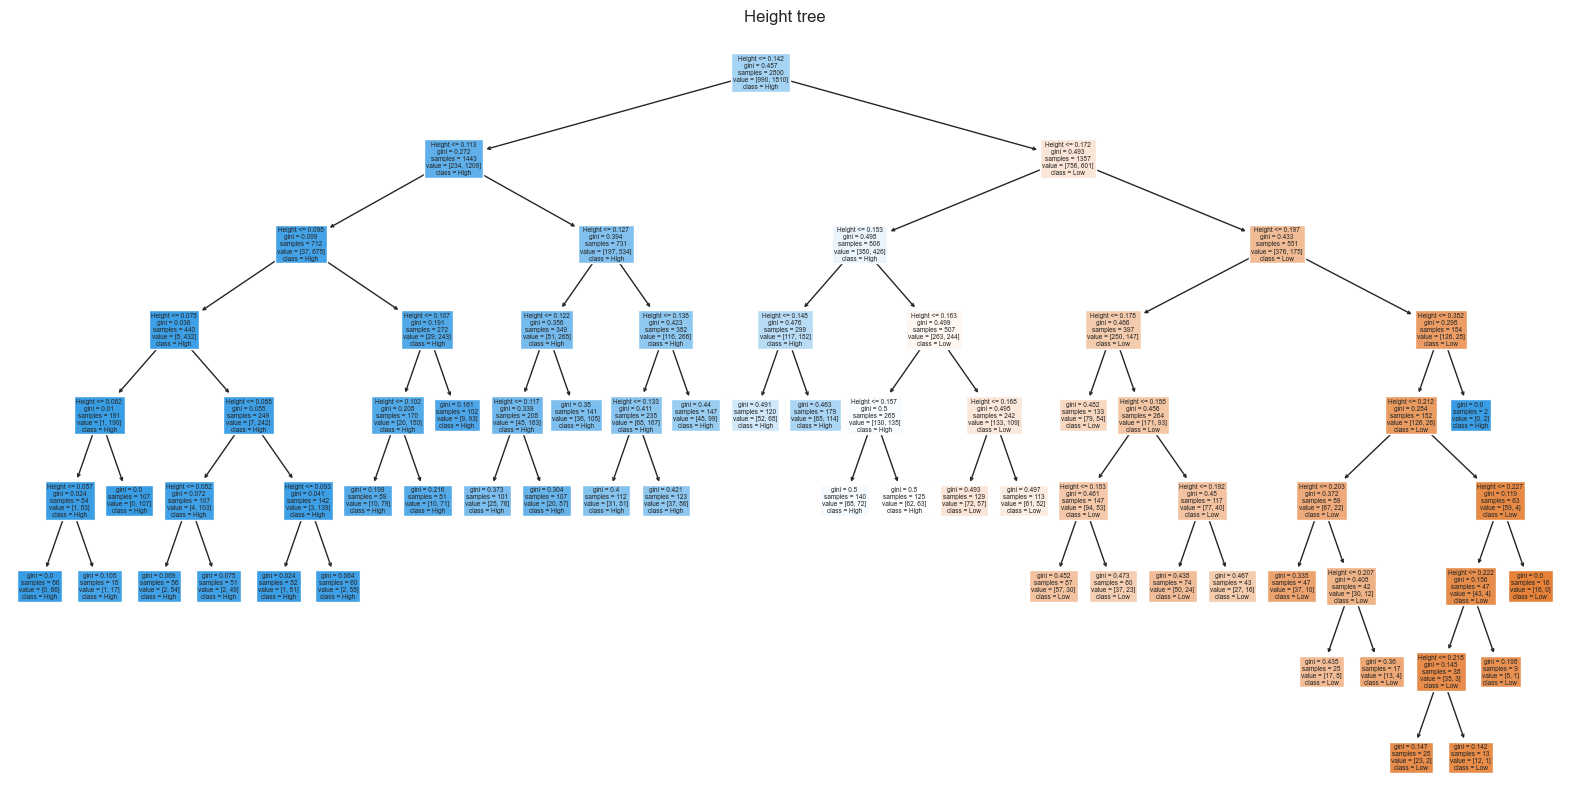

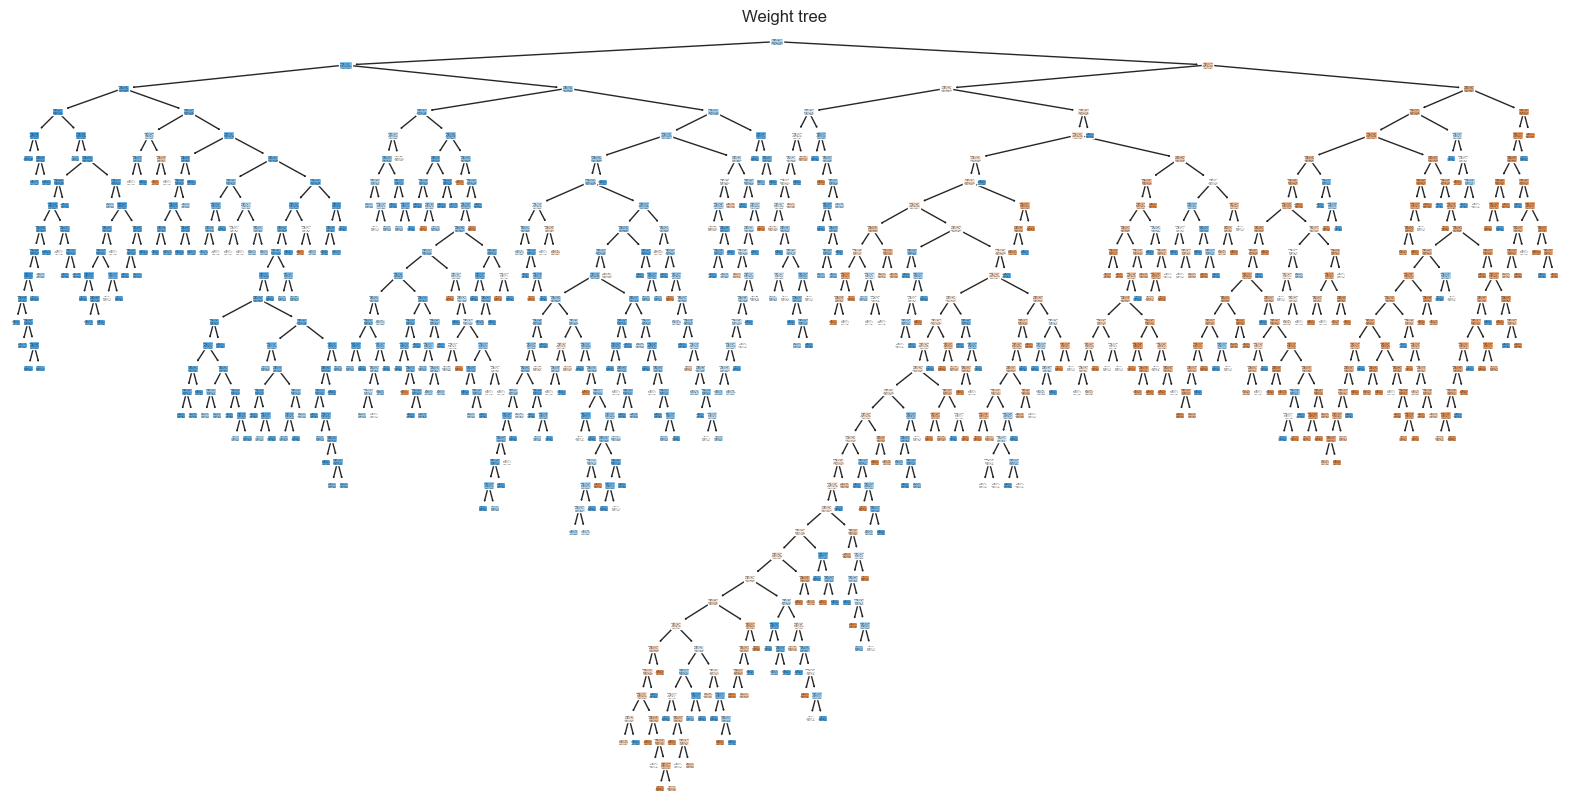

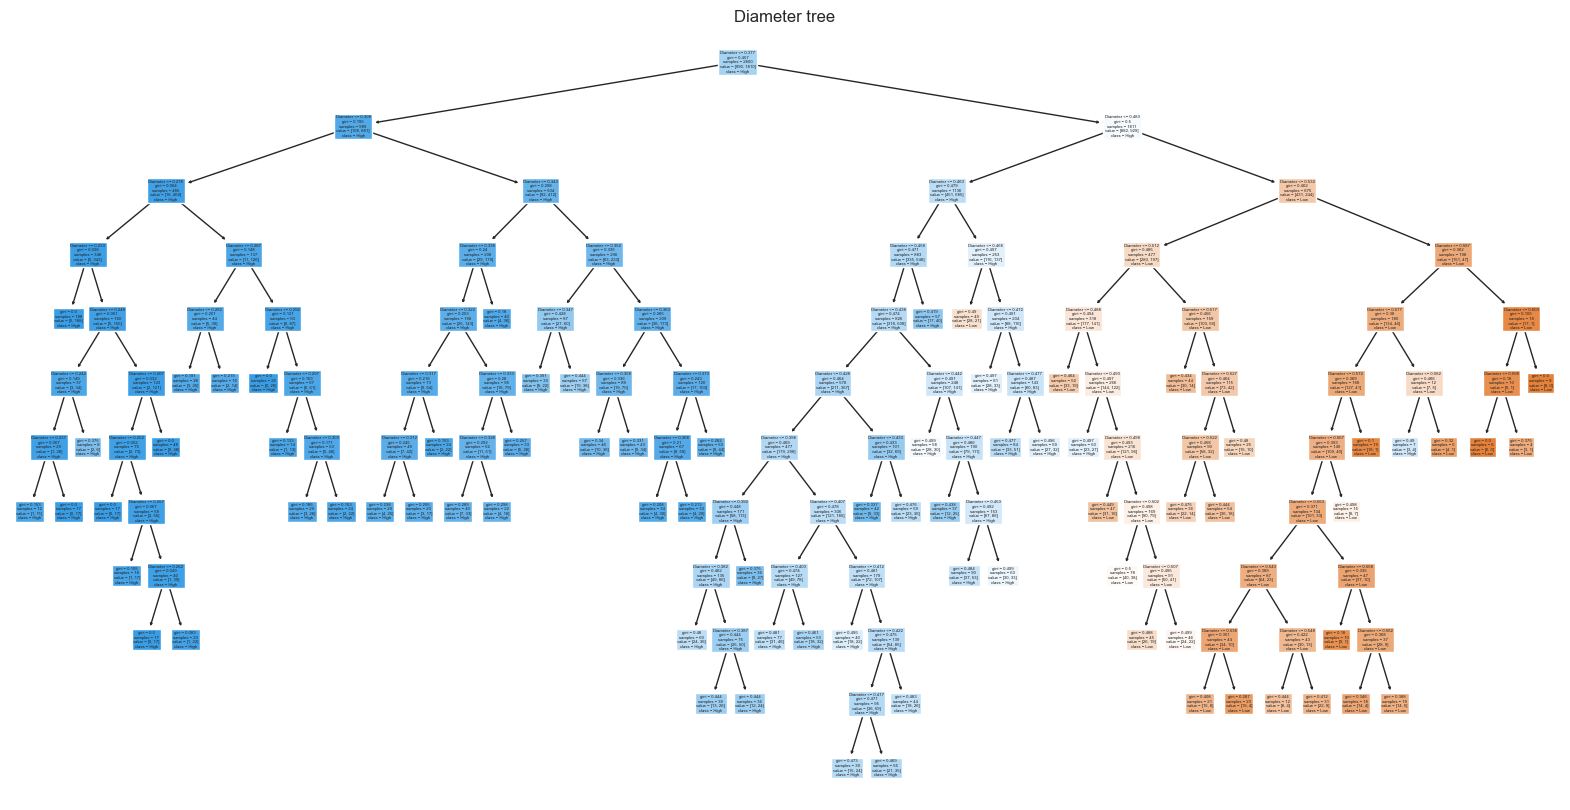

In [ ]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
for i, var in enumerate(X_train.columns):

    X_train_var = X_train[[var]]
    X_test_var = X_test[[var]]

    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_var, y_train)

    y_pred_train = dt.predict(X_train_var)
    y_pred_test = dt.predict(X_test_var)


    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)


    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    print(f"--- {var} Model ---")
    print(f"Classification Accuracy on Train: {acc_train}")
    print(f"Classification Accuracy on Test: {acc_test}")

    print(f"Confusion Matrix on Train:\n{cm_train}")
    print(f"Confusion Matrix on Test:\n{cm_test}\n")

    plt.figure(figsize=(20,10))
    plot_tree(dt, filled=True, feature_names=[X_train.columns[i]], class_names=['Low', 'High'])
    plt.title(f'{var} tree')

The uni-variate decision tree of the varibale "Weight" is the best in terms of predicting "Price", because the classification accuracy in the Train set and Test set of the variable "Weight" is highest.

# PROBLEM 3: MULTI-VARIATE DECISION TREE
a & b) multi-variate  decision tree model
c) fit a deep tree on the same Train data, max_depth = 20. Comment: Is this a better model than 3a?

## a)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9907142857142858

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6866666666666666



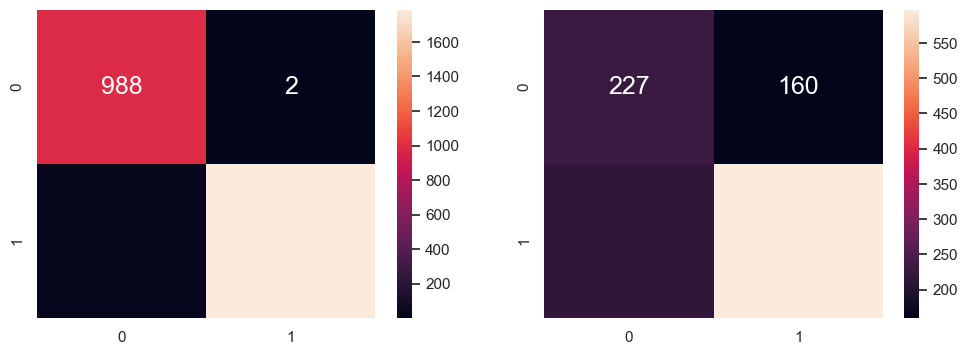

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
X = df[['Height', 'Weight', 'Diameter']]
y = df['Price']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 62)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier()  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()
#Plot decision tree
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns.tolist(),              # the features
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
graphviz.Source(treedot)

In [ ]:
X = df[['Height', 'Weight', 'Diameter']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

dt = DecisionTreeClassifier(random_state=62)
dt.fit(X_train, y_train)

print(dt.get_depth())
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Classification Accuracy on Train: {acc_train}")
print(f"Classification Accuracy on Test: {acc_test}")

28


NameError: name 'accuracy_score' is not defined

## c)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9657142857142857

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6933333333333334



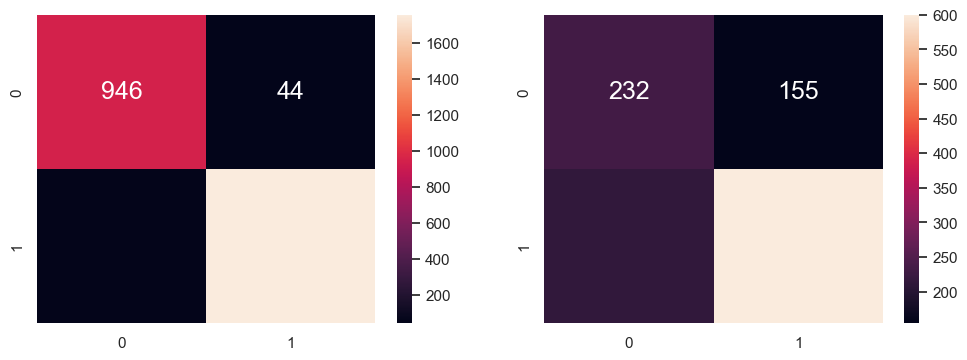

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
X = df[['Height', 'Weight', 'Diameter']]
y = df['Price']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 62)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()
#Plot decision tree
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns.tolist(),              # the features
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
graphviz.Source(treedot)

In [ ]:
X = df[['Height', 'Weight', 'Diameter']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

dt = DecisionTreeClassifier(random_state=62, max_depth=20)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f'Tree depth is {dt.get_depth()}')
print(f"Classification Accuracy on Train: {acc_train}")
print(f"Classification Accuracy on Test: {acc_test}")

NameError: name 'accuracy_score' is not defined

We can see that classification accuracy on Test set of model 3c is smaller than the classification accuracy on Train set of model 3a, meaning that the model 3c is not better than model 3a.

# Bonus Point

In [ ]:
X = df[['Height', 'Weight', 'Diameter']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracy_test = []
for i in range(1,30):
    dt = DecisionTreeClassifier(random_state=42,max_depth=i)
    dt.fit(X_train, y_train)

    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f'Tree depth is {i}')
    print(f"Classification Accuracy on Train: {acc_train}")
    print(f"Classification Accuracy on Test: {acc_test}")

Tree depth is 1
Classification Accuracy on Train: 0.7182142857142857
Classification Accuracy on Test: 0.6958333333333333
Tree depth is 2
Classification Accuracy on Train: 0.72
Classification Accuracy on Test: 0.7366666666666667
Tree depth is 3
Classification Accuracy on Train: 0.7457142857142857
Classification Accuracy on Test: 0.7208333333333333
Tree depth is 4
Classification Accuracy on Train: 0.7564285714285715
Classification Accuracy on Test: 0.7316666666666667
Tree depth is 5
Classification Accuracy on Train: 0.775
Classification Accuracy on Test: 0.7641666666666667
Tree depth is 6
Classification Accuracy on Train: 0.785
Classification Accuracy on Test: 0.7558333333333334
Tree depth is 7
Classification Accuracy on Train: 0.7960714285714285
Classification Accuracy on Test: 0.7566666666666667
Tree depth is 8
Classification Accuracy on Train: 0.8117857142857143
Classification Accuracy on Test: 0.7625
Tree depth is 9
Classification Accuracy on Train: 0.8285714285714286
Classification 

We could see that with depth = 5, the tree has the highest accuracy in the test dataset(0.76416), better than the model in part a) and c)

As we can see, when we increase the max depth of the multi-variate decision tree, classfication accuracy on the Test set also increases. However, when the max depth equals 5, the classification accuracy on the Test set reaches the max value (0.764167). Hence, to improve the decision tree model, we can increase the max depth to an appropriate value.